In [22]:
import matplotlib.pyplot as plt
import numpy as np

# !pip install git+https://github.com/pytorch/fairseq

In [76]:
import torch
import fairseq

model, cfg, task = fairseq.checkpoint_utils.load_model_ensemble_and_task([models_dir+"/wav2vec_large.pt"])
# models_dir = 'pre-trained_models'
# loaded_params = torch.load(models_dir+"/wav2vec_small.pt")
# model = loaded_params['model']

In [77]:
model = model[0].eval()

In [44]:
from rpdbcs.datahandler.dataset import readDataset

# ROOT_DIR = '/home/lhsmello/ufes/NINFA/lmello_RPDBCS3/data/data_classified_v6'
# D = readDataset(ROOT_DIR+'/freq.csv', ROOT_DIR+'/labels.csv',
#                 remove_first=100, nsigs=10000, npoints=10800)
# D.normalize(37.28941975);

ROOT_DIR = '/media/lhsmello/1EA2A053060E4A14/RPDBCS/data/data_classified_withTime_v4/data_time_02-12-2019'
D = readDataset(time_file=ROOT_DIR+'/time', feats_file=ROOT_DIR+"/labels.csv", 
                remove_first=100, nsigs=100)



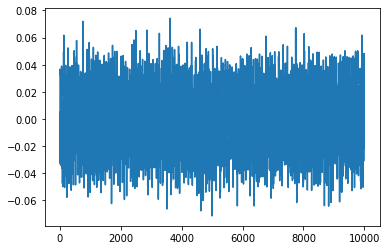

In [64]:
x = torch.FloatTensor(D.getSignal(0).time.getY()[:10000])
# xtime = np.fft.ifft(x)
plt.plot(x.numpy());

In [92]:
with torch.no_grad():
    z = model.feature_extractor(x.reshape(1,-1))
    c = model.feature_aggregator(z)
z.shape

torch.Size([1, 512, 60])

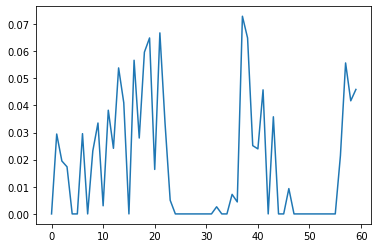

In [106]:
plt.plot(z[0][16].numpy());